In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Salary_Data_Based_country_and_race.csv') #Lectura de los datos 

In [4]:
data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [5]:
data.columns.values #Valores de las columnas 

array(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'], dtype=object)

## Cuantos valores nulos hay en cada columna 
Como son pocos podemos eliminarlos 

In [6]:
def null_values(data,lista): #Funcion para saber cuantos valores nulos hay en cada columna
    null_val = []
    for item in lista:

        null_val.append(pd.isnull(data[item]).values.ravel().sum()) 
        #Agrega a una lista los valores nulos de cada columna

    return null_val

lista = np.array(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'])
#Lista con los nombres de cada columna

valores_nulos = null_values(data,lista)
print('Los valores nulos en cada columna son: ', valores_nulos)

Los valores nulos en cada columna son:  [0, 2, 2, 3, 2, 3, 5, 0, 0]


In [7]:
data_new = data.copy()

Habia 2 variables con el mismo significado, asi que en esta linea lo resolvemos 

In [8]:
print(pd.get_dummies(data_new['Education Level']).columns.values)
data_new['Education Level'] = data_new['Education Level'].replace(['phD'], ['PhD'])
print(pd.get_dummies(data_new['Education Level']).columns.values)

["Bachelor's" "Bachelor's Degree" 'High School' "Master's"
 "Master's Degree" 'PhD' 'phD']
["Bachelor's" "Bachelor's Degree" 'High School' "Master's"
 "Master's Degree" 'PhD']


## Cambiar strings por numeros 

In [9]:

def change_values(data1):
#Funcion para cambiar los valores de las columnas por numeros 

    columnas = []
    for item in data1.columns.values:
        if data1[item].dtypes == 'object':
            columnas.append(item)
    #Esta parte crea una lista con valores que no sean floats o integer
            
    for item in columnas:
        valores_columnas = pd.get_dummies(data1[item]).columns.values #Crea una lista cada valor distinto en cada columna
        x = [i for i in range(valores_columnas.shape[0])] #Crea una lista de numeros del 0 hasta la longitud de valores_columnas
        data1[item] = data1[item].replace(valores_columnas, x) #Intercambia los valores
    
    return data1

In [10]:
change_values(data_new)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,1.0,0.0,177.0,5.0,90000.0,3,9
1,1,28.0,0.0,3.0,18.0,3.0,65000.0,4,5
2,2,45.0,1.0,5.0,145.0,15.0,150000.0,1,9
3,3,36.0,0.0,0.0,116.0,7.0,60000.0,4,5
4,4,52.0,1.0,3.0,26.0,20.0,200000.0,4,1
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,0.0,5.0,34.0,20.0,200000.0,3,7
6700,6700,32.0,1.0,2.0,116.0,3.0,50000.0,0,2
6701,6701,30.0,0.0,1.0,42.0,4.0,55000.0,2,4
6702,6702,46.0,1.0,4.0,97.0,14.0,140000.0,2,6


In [11]:
pd.get_dummies(data_new['Gender']).columns.values

array([0., 1., 2.])

La caracteristica 'Gender' tiene 3 valores, lo ideal seria tener dos asi que para que sea un cambio valido necesitamos que sean pocos datos con este valor 

In [12]:
print(pd.get_dummies(data['Gender']).columns.values)
print('El numero de veces que aparece Ohter es', np.count_nonzero(data['Gender'] == 'Other'))
data_new['Gender'] = data_new['Gender'].replace(2., None) #La variable Other fue ajustada tal que Other == 2., y aqui se reemplaza por NaN



['Female' 'Male' 'Other']
El numero de veces que aparece Ohter es 14


Quitamos los datos que no necesitamos o podemos prescindir

In [13]:
data2 = data_new.copy()
data2 = data2.dropna(axis=0,how="any") #Elimina todos los NaN
data2 = data2.drop('Unnamed: 0', axis = 1) #Elimina la primera columna 
data2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,1.0,0.0,177.0,5.0,90000.0,3,9
1,28.0,0.0,3.0,18.0,3.0,65000.0,4,5
2,45.0,1.0,5.0,145.0,15.0,150000.0,1,9
3,36.0,0.0,0.0,116.0,7.0,60000.0,4,5
4,52.0,1.0,3.0,26.0,20.0,200000.0,4,1
...,...,...,...,...,...,...,...,...
6699,49.0,0.0,5.0,34.0,20.0,200000.0,3,7
6700,32.0,1.0,2.0,116.0,3.0,50000.0,0,2
6701,30.0,0.0,1.0,42.0,4.0,55000.0,2,4
6702,46.0,1.0,4.0,97.0,14.0,140000.0,2,6


In [14]:
data2.describe()

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,2.562238,95.141083,8.077723,115307.175194,2.007780,4.869390
std,7.595994,1.817052,58.905403,6.029305,52806.810881,1.416941,3.386053
min,21.000000,0.000000,0.000000,0.000000,350.000000,0.000000,0.000000
25%,28.000000,1.000000,43.000000,3.000000,70000.000000,1.000000,1.000000
50%,32.000000,2.000000,97.000000,7.000000,115000.000000,2.000000,5.000000
75%,38.000000,4.000000,159.000000,12.000000,160000.000000,3.000000,9.000000
max,62.000000,5.000000,192.000000,34.000000,250000.000000,4.000000,9.000000


In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns


## Vista general de los datos 
Mediante seaborn hacemos un histograma para cada una de las caracteristicas para asi observar su forma, su distribucion y si hay algo que sea de relevancia.  \\ 

Las variables 'Age', 'Salary' y 'Years of Experience' son las unicas que aparentan seguir una distribucion. Las otras solo conforman un conjunto de datos cuantitativos que no siguen ninguna estructura estadistica. 


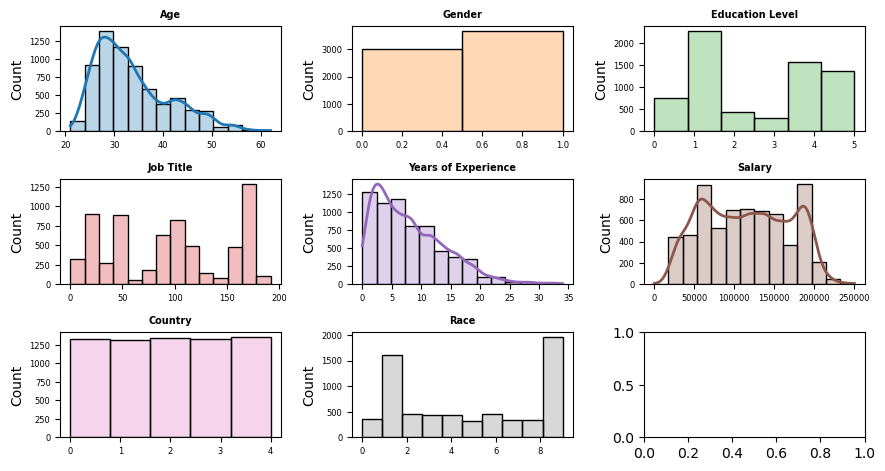

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
for i, colum in enumerate(data2):
    if pd.get_dummies(data2[colum]).columns.values.shape[0] <= 12:
        num_bins = pd.get_dummies(data2[colum]).columns.values.shape[0] 
    else:
        num_bins = 14
    with_curve = ['Salary', 'Age', 'Years of Experience']
    if any(colum == var for var in with_curve):
        sns.histplot(
            data     = data2,
            bins     = num_bins,
            x        = colum,
            stat     = "count",
            kde      = True,
            color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            line_kws = {'linewidth': 2},
            alpha    = 0.3,
            ax       = axes[i]
        )
    else:
        sns.histplot(
            data     = data2,
            bins     = num_bins,
            x        = colum,
            stat     = "count",
            color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            alpha    = 0.3,
            ax       = axes[i]
        )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)

## Estadistica sobre los datos 

In [ ]:
def kurtosis(data): #Funcion para obtener la kurtosis
    
    kurtosis = sum((x - np.mean(data)) ** 4 for x in data) / (len(data)* np.sqrt(np.var(data)) ** 4)

    return kurtosis


In [ ]:
import scipy.stats as st
print("Estadistica de Salary:", "media", np.mean(data2['Salary']), "desviacion estandar", np.sqrt(np.var(data2['Salary'])) , "asimetría", st.skew(data2['Salary']),"curtosis", kurtosis(data2['Salary'])) 
print("Estadistica de age:", "media", np.mean(data2['Age']), "desviacion estandar", np.sqrt(np.var(data2['Age'])) , "asimetría", st.skew(data2['Age']),"curtosis", kurtosis(data2['Age'])) 
print("Estadistica de Years of Experience:", "media", np.mean(data2['Years of Experience']), "desviacion estandar", np.sqrt(np.var(data2['Years of Experience'])) , "asimetría", st.skew(data2['Years of Experience']),"curtosis", kurtosis(data2['Years of Experience'])) 


Estadistica de Salary: media 115307.17519449431 desviacion estandar 52802.86049319835 asimetría 0.05822007333517386 curtosis 1.8333653616384324
Estadistica de age: media 33.61056253740275 desviacion estandar 7.595426179335146 asimetría 0.9035624090972223 curtosis 3.1857776484236324
Estadistica de Years of Experience: media 8.077722920406941 desviacion estandar 6.028853832796941 asimetría 0.9654929590194796 curtosis 3.7128109111331815


## Mejor distribucion para cada variable 

In [ ]:
from fitter import Fitter 
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic'] 
#Atributo
fitter_yoe = Fitter(data2['Years of Experience'], distributions= distribuciones)
fitter_yoe.fit()
fitter_yoe.get_best(method = 'sumsquare_error')

fitter_age = Fitter(data2['Age'], distributions= distribuciones)
fitter_age.fit()
fitter_age.get_best(method = 'sumsquare_error')

fitter_salary = Fitter(data2['Salary'], distributions= distribuciones)
fitter_salary.fit()
fitter_salary.get_best(method = 'sumsquare_error')

SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)


{'norm': {'loc': 115307.17519449431, 'scale': 52802.86049319856}}

In [ ]:
print('La mejor distribucion para salary es ',  fitter_salary.get_best(method = 'sumsquare_error') )
print('La mejor distribucion para age es ',  fitter_age.get_best(method = 'sumsquare_error') )
print('La mejor distribucion para years of experience es ',  fitter_yoe.get_best(method = 'sumsquare_error') )

La mejor distribucion para salary es  {'norm': {'loc': 115307.17519449431, 'scale': 52802.86049319856}}
La mejor distribucion para age es  {'gamma': {'a': 2.959547949456022, 'loc': 20.556502171474314, 'scale': 4.410814069978799}}
La mejor distribucion para years of experience es  {'beta': {'a': 1.2454264202304017, 'b': 5.0842070339355026, 'loc': -0.0625690283767105, 'scale': 41.32924411035516}}


## Graficas de las distribuciones 

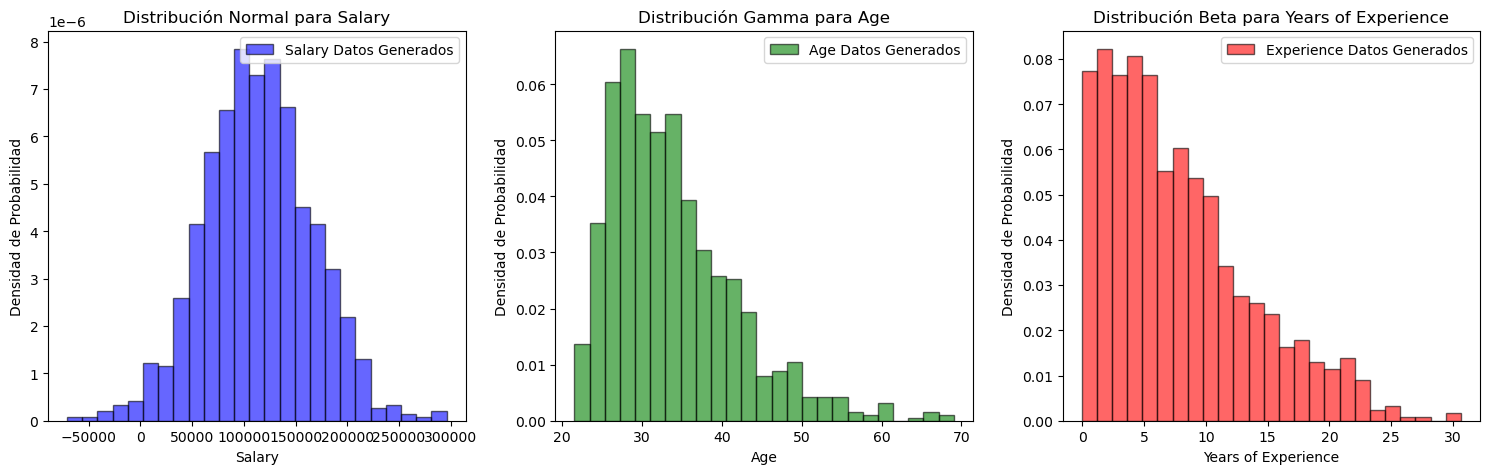

In [ ]:
from scipy.stats import norm, gamma, beta

# Parámetros de las distribuciones
params_salary = {'loc': 115307.17519449431, 'scale': 52802.86049319856}
params_age = {'a': 2.959547949456022, 'loc': 20.556502171474314, 'scale': 4.410814069978799}
params_experience = {'a': 1.2454264202304017, 'b': 5.0842070339355026, 'loc': -0.0625690283767105, 'scale': 41.32924411035516}

# Generar datos para las tres distribuciones
datos_salary = np.random.normal(**params_salary, size=1000)
datos_age = gamma.rvs(**params_age, size=1000)
datos_experience = beta.rvs(**params_experience, size=1000)

# Crear subplots para las tres distribuciones
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Trazar histograma y curva de densidad de probabilidad para "salary"
axs[0].hist(datos_salary, bins=25, density=True, alpha=0.6, color='b', label='Salary Datos Generados', edgecolor = 'k')
x_salary = np.linspace(min(datos_salary), max(datos_salary), 500)
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('Densidad de Probabilidad')
axs[0].legend()
axs[0].set_title('Distribución Normal para Salary')

# Trazar histograma y curva de densidad de probabilidad para "age"
axs[1].hist(datos_age, bins=25, density=True, alpha=0.6, color='green', label='Age Datos Generados', edgecolor = 'k')
x_age = np.linspace(0, 50, 500)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Densidad de Probabilidad')
axs[1].legend()
axs[1].set_title('Distribución Gamma para Age')

# Trazar histograma y curva de densidad de probabilidad para "years of experience"
axs[2].hist(datos_experience, bins=25, density=True, alpha=0.6, color='red', label='Experience Datos Generados', edgecolor = 'k')
x_experience = np.linspace(0, 1, 1000)
axs[2].set_xlabel('Years of Experience')
axs[2].set_ylabel('Densidad de Probabilidad')
axs[2].legend()
axs[2].set_title('Distribución Beta para Years of Experience')

plt.tight_layout()
plt.show()


## Metodo de filtrado 
Aqui se da el orden de importancia segun el metodo de filtrado. 

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier #decision trees 


x = data2['Salary']
entrenar = data2.drop(['Salary'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k = 'all').fit(entrenar, x)
score_values = np.sort(seleccionadas.scores_)[::-1]
columnas_ord = np.array(columnas)[np.argsort(seleccionadas.scores_)[::-1]]
columnas_ord
for i in range(len(columnas)):
    print('El valor de ', columnas_ord[i], 'es ', score_values[i])


El valor de  Years of Experience es  63.03785901559479
El valor de  Age es  25.87499459169732
El valor de  Education Level es  9.093026748929745
El valor de  Job Title es  5.323883877241233
El valor de  Gender es  4.306423146062751
El valor de  Country es  0.9806020764097035
El valor de  Race es  0.9673929362214989


## Graficas de correlacion 

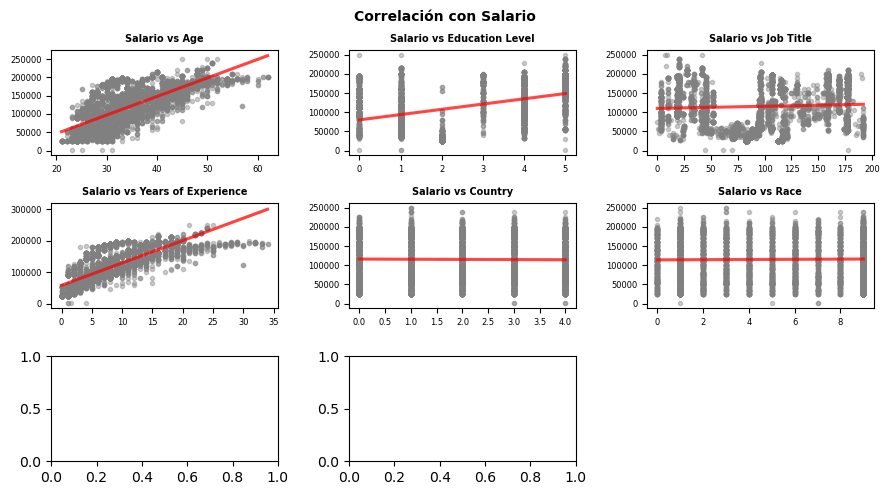

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas = data2.select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop('Salary') # objetivo

for i, colum in enumerate(columnas):
    sns.regplot(
        x           = data2[colum],
        y           = data2['Salary'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Salario vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Salario', fontsize = 10, fontweight = "bold");

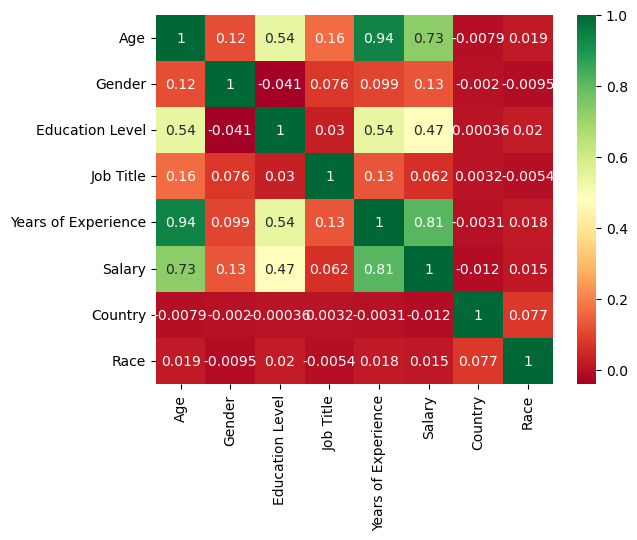

In [18]:
def matrix_corr(data): 
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
#Matriz de correlacion para los datos 

matrix_corr(data2)


array([0.2464176 , 0.03007185, 0.08886695, 0.2536851 ])